In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns= data.feature_names)
y = data.target 

In [4]:
# Convert y to a Pandas Series with a name for plotting
y_series = pd.Series(y, name="Diagnosis")

# Explore data
print(X.shape)  # (569, 30)
print("Target classes:", data.target_names)  # ['malignant', 'benign']
X.head()


(569, 30)
Target classes: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
X.duplicated().sum()

np.int64(0)

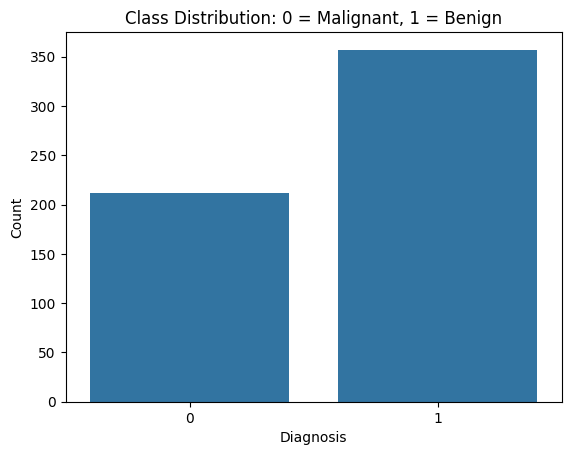

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(x=y_series)
plt.title("Class Distribution: 0 = Malignant, 1 = Benign")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


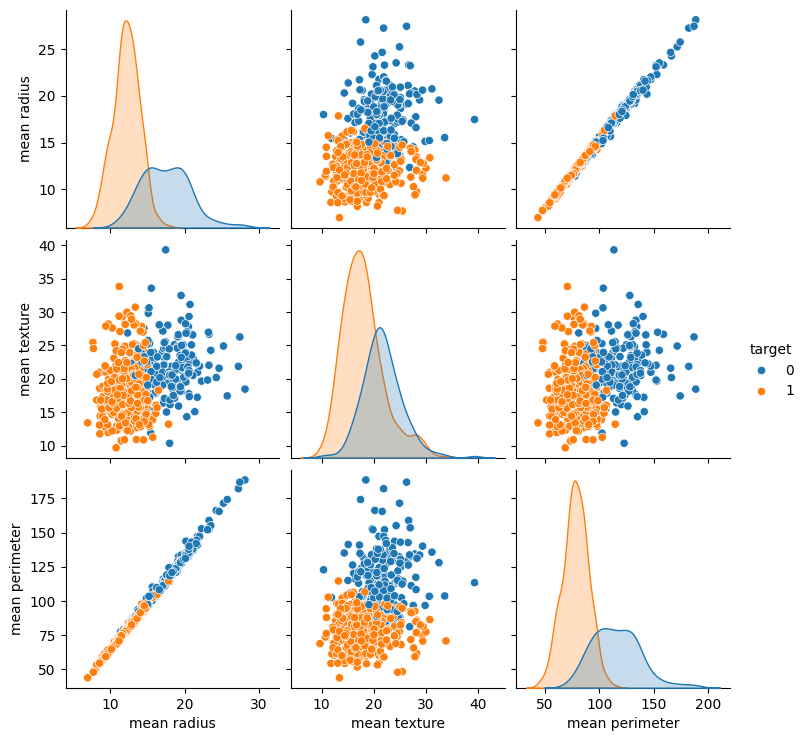

In [8]:
# Pairplot of first 3 features + target
subset = pd.DataFrame(X.iloc[:, :3])
subset['target'] = y
sns.pairplot(subset, hue='target')
plt.show()


# Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# SVM

SVM Kernel Comparison:
- 'linear': Fast, best for linearly separable data (K(x,y) = x·y)
- 'poly': Polynomial kernel (K(x,y) = (γ·x·y + r)^d), fits curved boundaries
- 'rbf': Gaussian (default), best for complex non-linear data (K(x,y) = exp(-γ|x-y|²))
- 'sigmoid': Like neural net activation (rarely used)
Code tests accuracy, confusion matrix & classification report for each

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Kernel: linear
Accuracy: 0.9766081871345029
Confusion Matrix:
 [[ 61   2]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Kernel: poly
Accuracy: 0.8947368421052632
Confusion Matrix:
 [[ 45  18]
 [  0 108]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        63
           1       0.86      1.00      0.92       108

    accuracy                           0.89       171
   macro avg       0.93      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171


Kernel: rbf
Accuracy: 0.9707602339181286
Confusion Matrix:
 [[ 61   2]
 [  3 105]]
Classification Report:
               prec

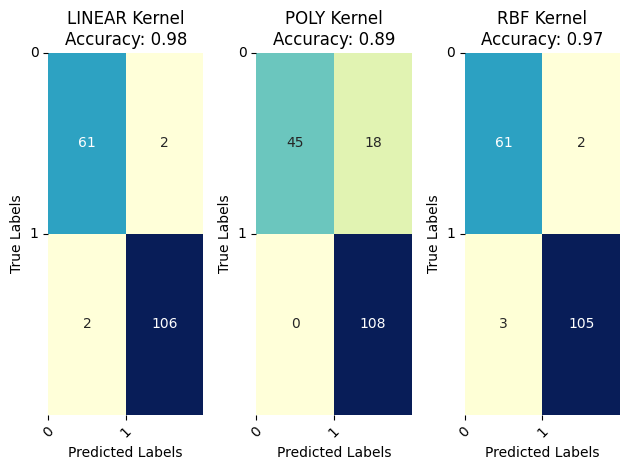

In [11]:
for i, kernel in enumerate(kernels, 1):
    clf = SVC(kernel=kernel).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title(f'{kernel.upper()} Kernel\nAccuracy: {accuracy_score(y_test, y_pred):.2f}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    
    # Add class labels if available
    if hasattr(clf, 'classes_'):
        plt.xticks(ticks=range(len(clf.classes_)), labels=clf.classes_, rotation=45)
        plt.yticks(ticks=range(len(clf.classes_)), labels=clf.classes_, rotation=0)

plt.tight_layout()
plt.show()

# Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert target to one-hot
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build model
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_split=0.2, verbose=0)


c:\Users\Elzoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


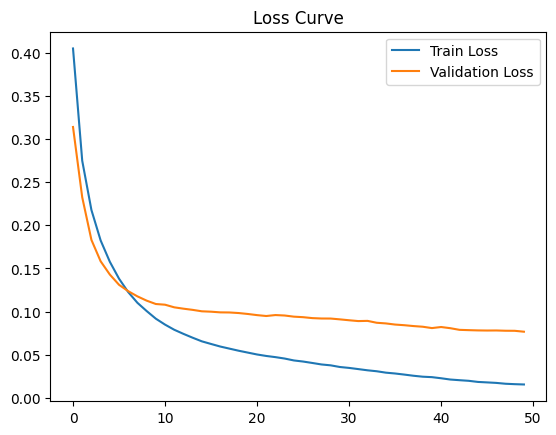

In [13]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()


In [14]:
import numpy as np

y_pred_nn = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_nn, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_labels))
print("Classification Report:\n", classification_report(y_test, y_pred_labels))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy: 0.9766081871345029
Confusion Matrix:
 [[ 62   1]
 [  3 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        63
           1       0.99      0.97      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



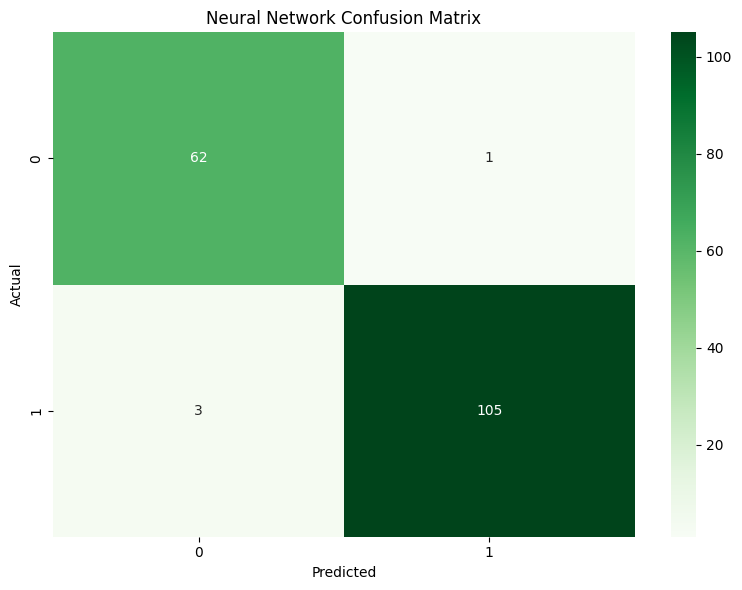

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_labels), 
            annot=True, fmt='d', cmap='Greens')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

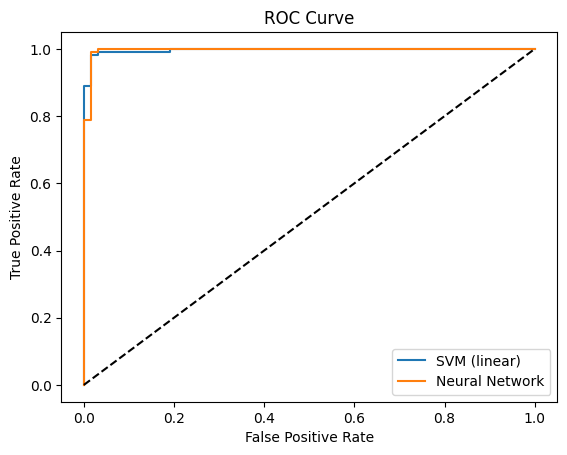

In [16]:
from sklearn.metrics import roc_curve

# SVM (RBF) with probabilities
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_probs = svm.predict_proba(X_test)[:, 1]

# Neural Network probs
nn_probs = y_pred_nn[:, 1]

# Calculate ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)

plt.plot(fpr_svm, tpr_svm, label='SVM (linear)')
plt.plot(fpr_nn, tpr_nn, label='Neural Network')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


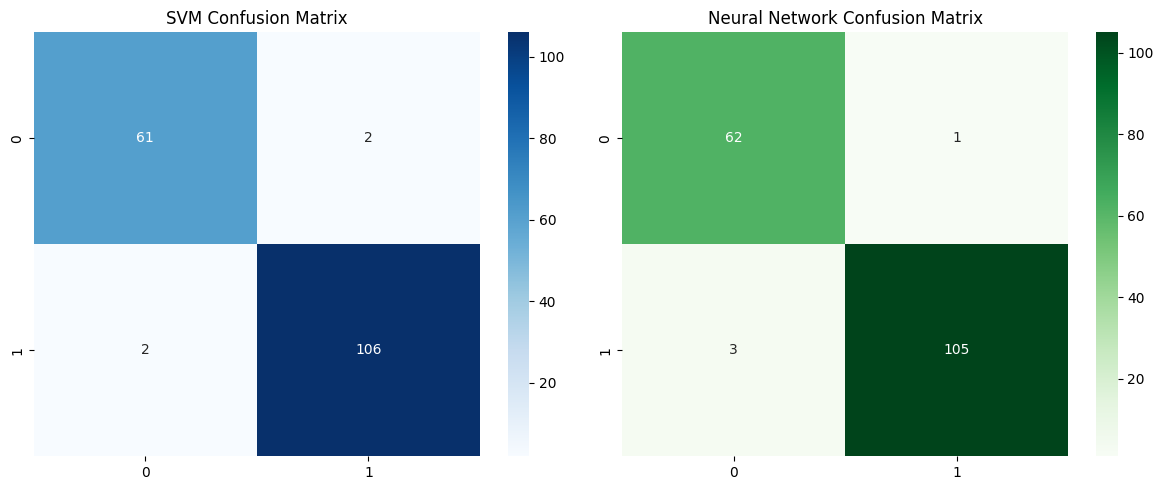

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('SVM Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_pred_labels), 
            annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title('Neural Network Confusion Matrix')

plt.tight_layout()
plt.show()